In [1]:
from sklearn.datasets import load_wine
import pandas as pd

In [2]:
LW=load_wine()
df_wine=pd.DataFrame(LW.data,columns=LW.feature_names)
df_wine['target']=LW.target
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


# Cardinalidad

In [3]:
df_wine.shape # Tenemos 178 observaciones (características) y 14 variables

(178, 14)

In [4]:
df_wine.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [5]:
df_wine.target.unique() # Características diferentes

array([0, 1, 2])

In [6]:
# Cardinalidad
df_wine.target.nunique() # :)

3

# Relaciones lineales

In [7]:
from scipy.optimize import minimize

In [8]:
# minimize?

Definimos el criterio de optimización:
$$
\frac{1}{N}\sum^N(a_0+a_1x-y)^2,
$$
donde $x$ y $y$ son los pares de observaciones, $N$ la cantidad de observaciones y los coeficientes $a_0$ y $a_1$, los parámetros a encontrar.

In [9]:
def mse(a,x,y):
  return ((a[0]+a[1]*x-y)**2).mean()

In [10]:
import numpy as np

In [11]:
# Encontramos la relación entre las variables y='ash' y x='alcalinity_of_ash'
objeto=minimize(mse,np.random.rand(2),args=(df_wine.alcalinity_of_ash,df_wine.ash))
objeto

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 0.06012981364537924
        x: [ 1.656e+00  3.642e-02]
      nit: 6
      jac: [ 1.742e-07  3.475e-06]
 hess_inv: [[ 1.763e+01 -8.789e-01]
            [-8.789e-01  4.508e-02]]
     nfev: 24
     njev: 8

Los valores optimos son `objeto.x`, el valor mínimo es `objeto.fun`, es decir
$$
alcalinity\_of\_ash=1.656+0.03642ash,
$$
además,
$$
\frac{1}{N}\sum^N(a_0+a_1x-y)^2=0.06013.
$$


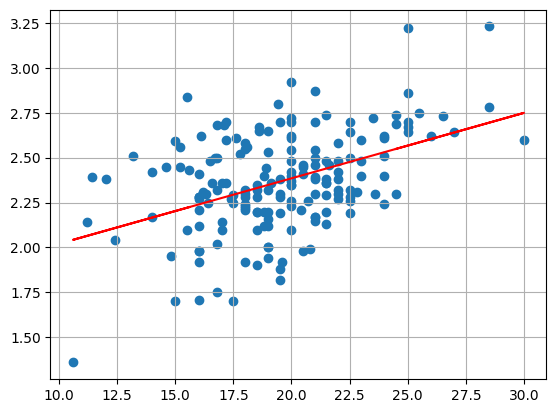

In [12]:
import matplotlib.pyplot as plt
plt.scatter(df_wine.alcalinity_of_ash,df_wine.ash)
plt.plot(df_wine.alcalinity_of_ash,objeto.x[0]+objeto.x[1]*df_wine.alcalinity_of_ash,'r')
plt.grid()

## Usando la clase de SKLearn

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lineal=LinearRegression()
lineal.fit(df_wine[['alcalinity_of_ash']],df_wine.ash)

LinearRegression()

In [15]:
lineal.coef_      # a_1

array([0.03642246])

In [16]:
lineal.intercept_ # a_0

1.6564630207373274

In [17]:
# R^2
lineal.score(df_wine[['alcalinity_of_ash']],df_wine.ash)

0.19657446211131158

In [18]:
#@title Regresión lineal entre `alcalinity_of_ash` y `alcohol` con `ash`
lineal=LinearRegression()
lineal.fit(df_wine[['alcalinity_of_ash','alcohol']],df_wine.ash)

LinearRegression()

In [19]:
lineal.coef_

array([0.04626681, 0.13053371])

In [20]:
lineal.intercept_

-0.2324709094164894

In [21]:
# R^2
lineal.score(df_wine[['alcalinity_of_ash','alcohol']],df_wine.ash)

0.3314183190176959